In [4]:
from drought.data.pipeline import *
from sklearn.cluster import KMeans
from shapely import Polygon
import pickle
import numpy as np

<b> Initial Clustering Attempt Using PAI and Climatic Data </b>

Ignore this for now - we discussed it last week

In [7]:
shape = get_gpd_polygons()

In [9]:
monthly = get_monthly_means_per_polygon()
cluster_input = monthly.groupby(["polygon_id"]).mean()
cluster_input

,month,year,pai,precipitation,temperature,radiation
polygon_id,,,,,,
1,6.342857,2020.314286,3.555716,293.765893,28.775501,1.395512e+07
2,6.394737,2020.342105,3.313128,263.506760,28.734562,1.420633e+07
3,6.096774,2020.354839,3.266357,251.702826,28.469306,1.392554e+07
4,6.384615,2020.384615,3.504819,235.860376,27.832612,1.484121e+07
5,6.384615,2020.384615,3.001037,172.098428,28.273038,1.589685e+07
6,6.384615,2020.384615,0.779162,116.032661,32.536969,1.703984e+07
7,6.384615,2020.384615,0.463933,68.682771,33.269556,1.771369e+07
8,6.384615,2020.384615,0.986440,64.882448,29.343542,1.502093e+07


In [194]:
def ecosystem_clustering(df, feature_cols):
    km = KMeans(n_clusters=2)
    km.fit(df[feature_cols])
    output = df.assign(cluster=km.predict(df[feature_cols]))

    return output

In [19]:
result = ecosystem_clustering(cluster_input, ["temperature", "precipitation", "radiation", "pai"])
result

/home/og309/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,month,year,pai,precipitation,temperature,radiation,cluster
polygon_id,,,,,,,
1,6.342857,2020.314286,3.555716,293.765893,28.775501,1.395512e+07,0
2,6.394737,2020.342105,3.313128,263.506760,28.734562,1.420633e+07,0
3,6.096774,2020.354839,3.266357,251.702826,28.469306,1.392554e+07,0
4,6.384615,2020.384615,3.504819,235.860376,27.832612,1.484121e+07,2
5,6.384615,2020.384615,3.001037,172.098428,28.273038,1.589685e+07,3
6,6.384615,2020.384615,0.779162,116.032661,32.536969,1.703984e+07,1
7,6.384615,2020.384615,0.463933,68.682771,33.269556,1.771369e+07,1
8,6.384615,2020.384615,0.986440,64.882448,29.343542,1.502093e+07,2


In [20]:
shape = shape.set_index(result.index)
shape = shape.assign(cluster = result["cluster"])

<AxesSubplot: >

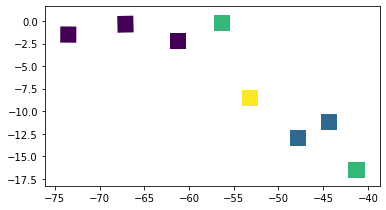

In [21]:
shape.plot(column = shape["cluster"])

<h1> Rasterisation! </h1>

<b> Import GEDI Footprints </b>

In [7]:
gedi_csv = get_gedi_footprints()

In [8]:
gedi_csv = gedi_csv[gedi_csv["pai"] > -9000]
gedi_csv

,pai,l2b_quality_flag,shot_number,lon_lowestmode,lat_lowestmode,geometry,year,month,polygon_id,polygon_spei
90,3.270860,1,20420500100053124,-73.012176,-2.148434,POINT (-73.01217550938594 -2.148433601199582),2019,4,1,Y
92,0.226100,1,20420500100053126,-73.011580,-2.147593,POINT (-73.01158014712219 -2.147592765811703),2019,4,1,Y
104,0.796234,1,20420500100053090,-73.022286,-2.162795,POINT (-73.02228628616268 -2.162794720210879),2019,4,1,Y
111,1.732929,1,21490600100274710,-72.754148,-1.163992,POINT (-72.7541482465911 -1.1639923700881025),2019,4,1,Y
112,1.270815,1,21490600100274708,-72.754743,-1.164835,POINT (-72.75474328953197 -1.1648345603875192),2019,4,1,Y
...,...,...,...,...,...,...,...,...,...,...
21569,4.859155,1,197430800400540965,-40.901799,-16.097564,POINT (-40.901798503505084 -16.09756415167545),2022,6,8,N
21570,2.089660,1,197430800400540966,-40.901472,-16.097975,POINT (-40.90147238514139 -16.09797536938862),2022,6,8,N
21571,2.213748,1,197430800400540967,-40.901166,-16.098368,POINT (-40.90116615300125 -16.098367597271835),2022,6,8,N
21572,0.108898,1,197430800400540968,-40.900845,-16.098774,POINT (-40.90084514219941 -16.098773842809226),2022,6,8,N


In [35]:
shape.geometry.bounds

,minx,miny,maxx,maxy
0,-74.416441,-2.412584,-72.602802,-0.605941
1,-68.035983,-1.306142,-66.197392,0.584974
2,-62.180343,-3.150466,-60.383712,-1.355298
3,-57.209042,-1.094028,-55.412411,0.702519
4,-54.088527,-9.368769,-52.291897,-7.591857
5,-48.750560,-13.786351,-46.953929,-12.035216
6,-45.257066,-12.098650,-43.460435,-10.336418
7,-42.170125,-17.343441,-40.373495,-15.620713


<b> Create Rasterized Grid with Footprints Matched to Cells</b>

rasterise_polygon generates a r x r grid (as a 2D list) and then assigns every footprint to the appropriate cell. The end result is a 2D list of DataFrames. Interestingly higher resolution grids are generated faster, since the individual dataframes for each cell are smaller and pd.concat becomes slower with larger dataframe sizes.

In [53]:
def rasterise_polygon(r, df, shape, polygon):

    df = df[df["polygon_id"] == polygon]
    geometry = shape.geometry[polygon - 1]

    grid = [[pd.DataFrame()]*r for i in range(r)]

    minx, miny, maxx, maxy = geometry.bounds
    stepx = (maxx - minx) / r
    stepy = (maxy - miny) / r

    for i in range(len(df)):
        footprint = df.iloc[[i]]
        lon = footprint["lon_lowestmode"]
        lat = footprint["lat_lowestmode"]
        x = floor((lon - minx) / stepx) 
        y = floor((maxy - lat) / stepy)
        grid[y][x] = pd.concat([grid[y][x], footprint])
        if (i%100000==0):
            print(i)

    return grid

In [135]:
grid_10 = rasterise_polygon(10, gedi_csv, shape, 1)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000


<b> Create Shapely Polygons for Each Grid Cell </b>

Encodes geospatial information for every cell for convenient plotting.

In [13]:
def grid_cells(r, shape, polygon):

    geometry = shape.geometry[polygon - 1]
    
    minx, miny, maxx, maxy = geometry.bounds
    stepx = (maxx - minx) / r
    stepy = (maxy - miny) / r

    curx = minx
    cury = maxy

    cells = []

    for y in range(r):
        for x in range(r):
            cell = Polygon([(curx, cury), (curx + stepx, cury), (curx + stepx, cury - stepy), (curx, cury - stepy)])
            cells.append(cell)
            curx += stepx
        cury -= stepy
        curx = minx

    cells = gpd.GeoDataFrame(cells, columns = ["geometry"])
    
    return cells

In [136]:
cells = grid_cells(10, shape, 1)

<b> Plot Means of Selected Variable </b>

Combines spatial information from grid_cells with footprints from rasterise_polygon to plot means by cell of a given variable.

In [12]:
def plot_raster(r, grid, cells, var):

    means = []

    for y in range(r):
        for x in range(r):
            means.append(grid[y][x][var].mean())

    cells[var] = means

    cells.plot(column = var, cmap = "Greens")

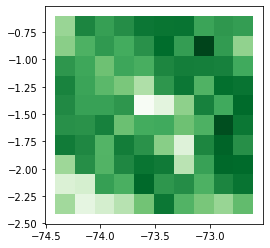

In [138]:
plot_raster(10, grid_10, cells, "pai")

This is just getting 10 x 10 rasterised grids of all the other polygons.

In [141]:
grid_10_p1 = grid_10
grid_10_p2 = rasterise_polygon(10, gedi_csv, shape, 2)
grid_10_p3 = rasterise_polygon(10, gedi_csv, shape, 3)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000


In [145]:
grid_10_p4 = rasterise_polygon(10, gedi_csv, shape, 4)
grid_10_p5 = rasterise_polygon(10, gedi_csv, shape, 5)
grid_10_p6 = rasterise_polygon(10, gedi_csv, shape, 6)
grid_10_p7 = rasterise_polygon(10, gedi_csv, shape, 7)
grid_10_p8 = rasterise_polygon(10, gedi_csv, shape, 8)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000


Noticed that P1 and P3 still have -9999 PAI values - might be worth dealing with this in the database itself

In [157]:
for i in range(10):
    for j in range(10):
        grid_10_p1[i][j] = grid_10_p1[i][j][grid_10_p1][i][j]["pai"] > -9000]

for i in range(10):
    for j in range(10):
        grid_10_p3[i][j] = grid_10_p3[i][j][grid_10_p3][i][j]["pai"] > -9000]

<b> Saving 10 x 10 Grids (very inefficiently) </b>

In [165]:
grid_10_all = []

In [167]:
grid_10_all.append(grid_10_p1)
grid_10_all.append(grid_10_p2)
grid_10_all.append(grid_10_p3)
grid_10_all.append(grid_10_p4)
grid_10_all.append(grid_10_p5)
grid_10_all.append(grid_10_p6)
grid_10_all.append(grid_10_p7)
grid_10_all.append(grid_10_p8)

In [180]:
with open("/maps-priv/maps/drought-with-gedi/gedi_data/grid_10", "wb") as fp:
    pickle.dump(grid_10_all, fp)
    fp.close()

In [11]:
with open("/maps-priv/maps/drought-with-gedi/gedi_data/grid_10", "rb") as fp:
    grid_10 = pickle.load(fp)

<b> Plotting All Polygons at Once and Clustering </b>

In [192]:
def plot_raster_all(r, grid, shape, var):

    cells = pd.DataFrame()

    for polygon in range(1,9):
        cells = pd.concat([cells, grid_cells(r, shape, polygon)])

    means = []

    for i in range(8):
        for y in range(r):
            for x in range(r):
                means.append(grid[i][y][x][var].mean())

    cells[var] = means

    cells.plot(column = var, cmap = "Greens")

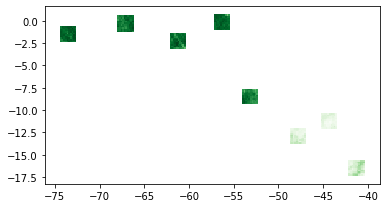

In [193]:
plot_raster_all(10,grid_10,shape,"pai")

In [223]:
def cluster_all(r, grid, shape, var):

    cells = pd.DataFrame()

    for polygon in range(1,9):
        cells = pd.concat([cells, grid_cells(r, shape, polygon)])

    means = []

    for i in range(8):
        for y in range(r):
            for x in range(r):
                means.append(grid[i][y][x][var].mean())

    cells[var] = means

    cells = ecosystem_clustering(cells,[var])

    cells.plot(column = "cluster", legend = True)

    return cells.groupby("cluster").mean()

/home/og309/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_266543/399232658.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return cells.groupby("cluster").mean()


,pai
cluster,
0,3.654263
1,0.710367
2,3.026651


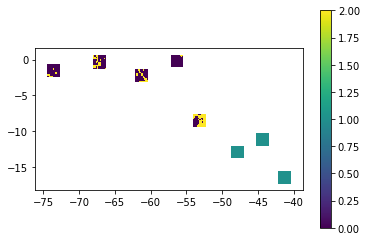

In [224]:
cluster_all(10,grid_10,shape,"pai")

<AxesSubplot: title={'center': 'pai'}, xlabel='polygon_id'>

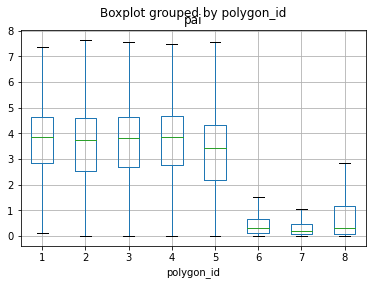

In [226]:
gedi_csv.boxplot(column="pai",by="polygon_id",showfliers=False)

In [ ]:
# Do boxplots of climatic data
# Classify with time series next

In [54]:
grid_100_p1 = rasterise_polygon(100,gedi_csv,shape,1)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000


In [55]:
grid_1000_p1 = rasterise_polygon(1000,gedi_csv,shape,1)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000


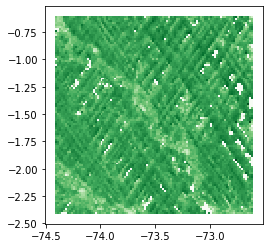

In [76]:
plot_raster(100, grid_100_p1, cells, "pai", pd.DataFrame.mean)

In [77]:
cells = grid_cells(1000, shape, 1)

In [79]:
for y in range(1000):
    for x in range(1000):
        if len(grid_1000_p1[y][x]) != 0:
            grid_1000_p1[y][x] = grid_1000_p1[y][x][grid_1000_p1[y][x]["pai"] > -9000]

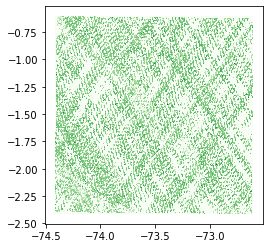

In [80]:
plot_raster(1000, grid_1000_p1, cells, "pai", pd.DataFrame.mean)

<b> Optimising Performance of Rasterisation </b>

In [1]:
def rasterise_polygon(r, df, shape, polygon):

    df = df[df["polygon_id"] == polygon]
    geometry = shape.geometry[polygon - 1]

    minx, miny, maxx, maxy = geometry.bounds
    stepx = (maxx - minx) / r
    stepy = (maxy - miny) / r

    df['x'] = ((df['lon_lowestmode'] - minx) / stepx).apply(np.floor)
    df['y'] = ((maxy - df['lat_lowestmode']) / stepy).apply(np.floor)

    return df

In [12]:
test = rasterise_polygon(10,gedi_csv,shape,1)

/tmp/ipykernel_3528150/2766178951.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = ((df['lon_lowestmode'] - minx) / stepx).apply(np.floor)
/tmp/ipykernel_3528150/2766178951.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = ((maxy - df['lat_lowestmode']) / stepy).apply(np.floor)


In [12]:
def calculate_grid_geometry(df, r, shape, polygon, columns_to_keep):
    '''
        Given a Pandas.DataFrame with x and y columns, replace those with the
        appropriate geometry column.
    
    '''
    geometry = shape.geometry[polygon - 1]

    minx, miny, maxx, maxy = geometry.bounds
    stepx = (maxx - minx) / r
    stepy = (maxy - miny) / r

    def calc_geometry(row):
        curx = minx + row['x'] * stepx
        cury = maxy - row['y'] * stepy
        return Polygon([(curx, cury), (curx + stepx, cury), (curx + stepx, cury - stepy), (curx, cury - stepy)])
    
    df['geometry'] = df.apply(calc_geometry, axis=1)
    df = df.drop(columns=['x', 'y'])

    geo_df = gpd.GeoDataFrame(df, columns = ["geometry", *columns_to_keep])
    return geo_df

In [34]:
def raster_plot(df, r, shape, polygon, var):

    df = df.groupby(['x', 'y']).mean()[var].reset_index()
    geo_df = calculate_grid_geometry(df, r, shape, polygon, [var])

    geo_df.plot(column = var, cmap = 'Greens')

/tmp/ipykernel_3528150/4161984148.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['x', 'y']).mean()[var].reset_index()


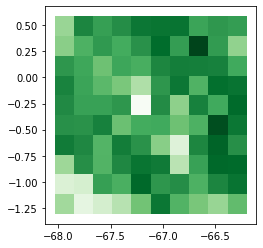

In [35]:
raster_plot(test, 10, shape, 1, 'pai')

In [13]:
from drought.data.rasterisation import *

In [15]:
grid = rasterise_polygon(10, gedi_csv, shape, 1)

/home/og309/drought-with-gedi/drought/data/rasterisation.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = ((df['lon_lowestmode'] - minx) / stepx).apply(np.floor)
/home/og309/drought-with-gedi/drought/data/rasterisation.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = ((maxy - df['lat_lowestmode']) / stepy).apply(np.floor)


/home/og309/drought-with-gedi/drought/data/rasterisation.py:61: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['x', 'y']).mean()[var].reset_index()


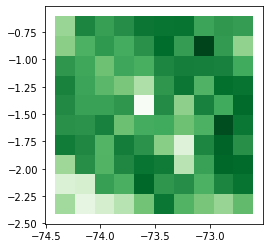

In [40]:
plot_raster(grid, 10, shape, 1, 'pai')

In [9]:
import ee

In [2]:
ee.Authenticate()


Successfully saved authorization token.


In [10]:
ee.Initialize()

In [6]:
import os 
os.chdir("/home/og309/drought-with-gedi/notebooks/exploratory/")

In [16]:
geo_grid = calculate_grid_geometry(grid,10,shape,1,['pai'])

/home/og309/drought-with-gedi/drought/data/rasterisation.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = df.apply(calc_geometry, axis=1)


In [23]:
polygons = geo_grid['geometry'].apply(lambda x: shapely.geometry.Polygon(x).wkt)


In [22]:
import shapely

In [67]:
df = grid.groupby(['x','y']).mean()['pai'].reset_index()
geo_grid = calculate_grid_geometry(df, 10, shape, 1, ['pai'])

/tmp/ipykernel_3704430/3263618868.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = grid.groupby(['x','y']).mean()['pai'].reset_index()


In [22]:
import ee
ee.Initialize()

In [2]:
drought = ee.ImageCollection('IDAHO_EPSCOR/TERRACLIMATE')

In [4]:
dS = '2000-01-01'
dE = '2021-01-01'
dSUTC = ee.Date(dS, 'GMT')
dEUTC = ee.Date(dE, 'GMT')

In [5]:
filtered = drought.filterDate(dSUTC, dEUTC.advance(1, 'day'))

In [6]:
PDSI = filtered.select('pdsi')

In [7]:
PDSI_image = PDSI.mean()

In [32]:
url = PDSI_image.getThumbURL({
    'dimensions': 1024,
    'min': -1000,
    'max': 1000,
    'palette': ['1a3678', '2955bc', '5699ff', '8dbae9', 'acd1ff', 'caebff', 'e5f9ff',
    'fdffb4', 'ffe6a2', 'ffc969', 'ffa12d', 'ff7c1f', 'ca531a', 'ff0000',
    'ab0000'],
    'format': 'jpg'
})

Image(url=url)

In [9]:
from IPython.display import Image

In [21]:
PDSI

In [22]:
PDSI.max()

In [23]:
import matplotlib.pyplot as plt

In [25]:
PDSI_image.bandNames().getInfo()

['pdsi']

TypeError: Image data of dtype object cannot be converted to float

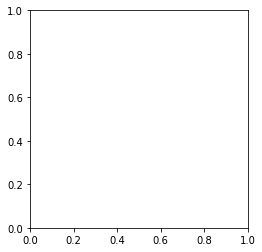

In [31]:
Image.

In [33]:
worldwide

In [36]:
from drought.data.pipeline import *

In [54]:
PDSI.filterBounds(polygons.geometry)

AttributeError: 'list' object has no attribute 'geometry'

In [48]:
test_1.mean()

In [50]:
url = test_1.mean().getThumbURL({
    'dimensions': 512,
    'min': -1000,
    'max': 1000,
    'palette': ['1a3678', '2955bc', '5699ff', '8dbae9', 'acd1ff', 'caebff', 'e5f9ff',
    'fdffb4', 'ffe6a2', 'ffc969', 'ffa12d', 'ff7c1f', 'ca531a', 'ff0000',
    'ab0000'],
    'format': 'jpg'
})

Image(url=url)

In [ ]:
climate_stack.map(lambda img: ee.ImageCollection(
        [img.clip(geometry) for geometry in geometries]).mosaic()
        .copyProperties(img, ['year', 'month', 'date', 'system:time_start']))

In [56]:
clipped = PDSI.map(lambda img: ee.ImageCollection(
        [img.clip(polygon) for polygon in polygons]).mosaic()
        .copyProperties(img, ['year', 'month', 'date', 'system:time_start']))

In [62]:
test = PDSI.map(lambda img: ee.ImageCollection(img.clip(polygons[0])).mosaic()
        .copyProperties(img, ['year', 'month', 'date', 'system:time_start']))

In [91]:
for polygon in range(8):

    drought = PDSI.map(lambda img: img.clip(polygons[polygon]))

    for i in range(21):
        dS = f'{2000+i}-01-01'
        dE = f'{2001+i}-01-01'
        dSUTC = ee.Date(dS, 'GMT')
        dEUTC = ee.Date(dE, 'GMT')
        filtered = drought.filterDate(dSUTC, dEUTC.advance(1, 'day'))


{'type': 'ImageCollection',
 'bands': [],
 'id': 'IDAHO_EPSCOR/TERRACLIMATE',
 'version': 1650072976158976,
 'properties': {'system:visualization_0_min': '-300.0',
  'type_name': 'ImageCollection',
  'keywords': ['climate',
   'drought',
   'evapotranspiration',
   'geophysical',
   'global',
   'merced',
   'monthly',
   'palmer',
   'pdsi',
   'precipitation',
   'runoff',
   'temperature',
   'vapor',
   'wind'],
  'system:visualization_1_palette': ['1a3678',
   '2955bc',
   '5699ff',
   '8dbae9',
   'acd1ff',
   'caebff',
   'e5f9ff',
   'fdffb4',
   'ffe6a2',
   'ffc969',
   'ffa12d',
   'ff7c1f',
   'ca531a',
   'ff0000',
   'ab0000'],
  'thumb': 'https://mw1.google.com/ges/dd/images/IDAHO_EPSCOR_TERRACLIMATE_thumb.png',
  'description': '<p>TerraClimate is a dataset of monthly climate and climatic water balance for\nglobal terrestrial surfaces. It uses climatically aided interpolation,\ncombining high-spatial resolution climatological normals from the\n<a href="https://www.world

In [75]:
series.getInfo()
attempt = np.array(list(dic_series['features'][0]['properties'].values()))

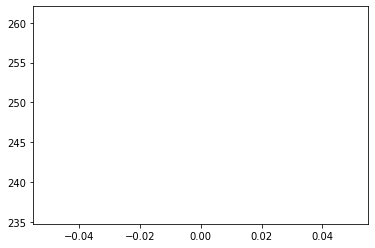

In [76]:
for polygon in range(8):

    drought = PDSI.map(lambda img: img.clip(polygons[polygon]))

    for i in range(21):
        dS = f'{2000+i}-01-01'
        dE = f'{2001+i}-01-01'
        dSUTC = ee.Date(dS, 'GMT')
        dEUTC = ee.Date(dE, 'GMT')
        filtered = drought.filterDate(dSUTC, dEUTC.advance(1, 'day'))

In [92]:
drought = PDSI.map(lambda img: img.clip(polygons[0]))

In [93]:
i=0

dS = f'{2000+i}-01-01'
dE = f'{2001+i}-01-01'
dSUTC = ee.Date(dS, 'GMT')
dEUTC = ee.Date(dE, 'GMT')
filtered = drought.filterDate(dSUTC, dEUTC.advance(1, 'day'))

In [98]:
filtered.reduceRegions(reducer = ee.Reduce.mean())

AttributeError: 'ImageCollection' object has no attribute 'reduceRegions'

In [107]:
series = PDSI_image.reduceRegions(collection = polygons[1], reducer = ee.Reducer.mean(), scale = 500)

In [110]:
series.getInfo()['features']

[{'type': 'Feature',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-67.99355037954085, -1.3061418651652839],
     [-66.1973921836928, -1.2649559462754147],
     [-66.23982435716897, 0.584973880385283],
     [-68.03598255301704, 0.5437795909386883],
     [-67.99355037954085, -1.3061418651652839]]]},
  'id': '0',
  'properties': {'mean': 174.06948918358705}}]

In [119]:
PDSI_df = pd.DataFrame()

drought = PDSI

for polygon in range(8):

    for i in range(21):
        dS = f'{2000+i}-01-01'
        dE = f'{2001+i}-01-01'
        dSUTC = ee.Date(dS, 'GMT')
        dEUTC = ee.Date(dE, 'GMT')
        filtered = drought.filterDate(dSUTC, dEUTC.advance(1, 'day'))

        image = filtered.mean()
        series = image.reduceRegions(collection = polygons[polygon],
                                     reducer = ee.Reducer.mean(),
                                     scale = 500)
        
        palmer = series.getInfo()['features'][0]['properties']['mean']

        PDSI_df = PDSI_df.append({'year': 2000 + i, 'polygon': polygon + 1, 'pdsi': palmer}, ignore_index = True)


/tmp/ipykernel_3961606/158573505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PDSI_df = PDSI_df.append({'year': 2000 + i, 'polygon': polygon + 1, 'pdsi': palmer}, ignore_index = True)
/tmp/ipykernel_3961606/158573505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PDSI_df = PDSI_df.append({'year': 2000 + i, 'polygon': polygon + 1, 'pdsi': palmer}, ignore_index = True)
/tmp/ipykernel_3961606/158573505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PDSI_df = PDSI_df.append({'year': 2000 + i, 'polygon': polygon + 1, 'pdsi': palmer}, ignore_index = True)
/tmp/ipykernel_3961606/158573505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

In [112]:
PDSI_df = pd.DataFrame()

In [113]:
test = {'year': 2000, 'polygon_id': 1, 'pdsi': 50}

<AxesSubplot: title={'center': 'pdsi'}, xlabel='polygon'>

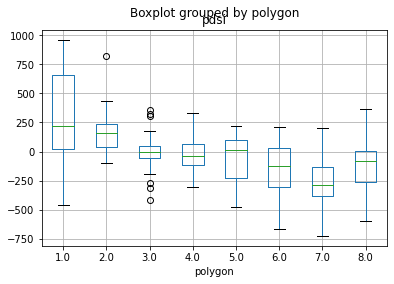

In [122]:
PDSI_df.boxplot(column = 'pdsi', by='polygon')

In [3]:
from drought.data.rasterisation import *

In [1]:
import os
os.chdir("/home/og309/drought-with-gedi/notebooks/exploratory/")

/home/og309/drought-with-gedi/drought/data/rasterisation.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = ((df['lon_lowestmode'] - minx) / stepx).apply(np.floor)
/home/og309/drought-with-gedi/drought/data/rasterisation.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = ((maxy - df['lat_lowestmode']) / stepy).apply(np.floor)
/home/og309/drought-with-gedi/drought/data/rasterisation.py:62: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a fu

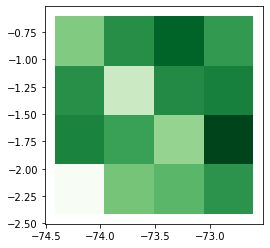

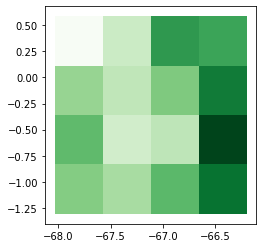

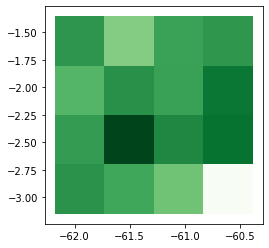

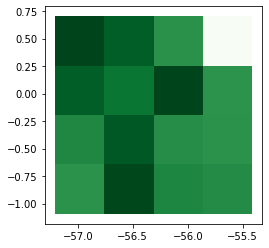

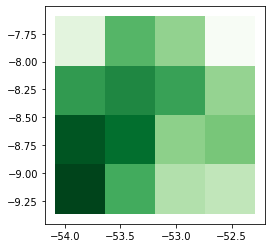

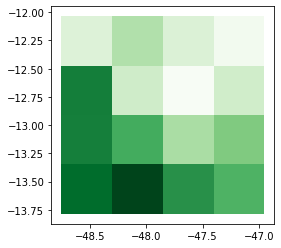

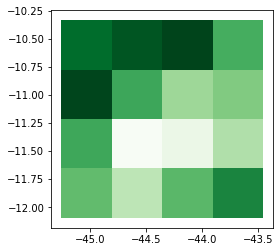

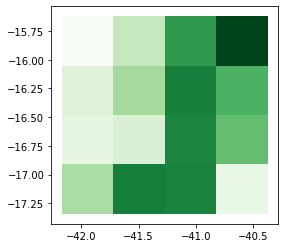

In [10]:
for polygon in range(1,9):
    grid = rasterise_polygon(4,gedi_csv,shape,polygon)
    plot_raster(grid,4,shape,polygon,'pai')

/tmp/ipykernel_4117835/1170520431.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gedi_csv.groupby(['year', 'month', 'polygon_id']).mean().reset_index().boxplot(column = 'pai', by='polygon_id')


<AxesSubplot: title={'center': 'pai'}, xlabel='polygon_id'>

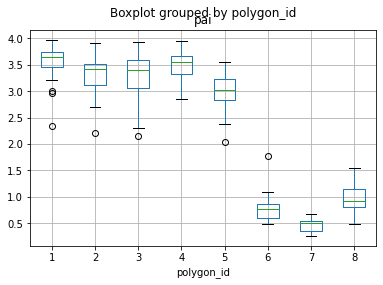

In [14]:
gedi_csv.groupby(['year', 'month', 'polygon_id']).mean().reset_index().boxplot(column = 'pai', by='polygon_id')

In [ ]:
PDSI_df = pd.DataFrame()

drought = PDSI

for polygon in range(8):

    for i in range(21):
        dS = f'{2000+i}-01-01'
        dE = f'{2001+i}-01-01'
        dSUTC = ee.Date(dS, 'GMT')
        dEUTC = ee.Date(dE, 'GMT')
        filtered = drought.filterDate(dSUTC, dEUTC.advance(1, 'day'))

        image = filtered.mean()
        series = image.reduceRegions(collection = polygons[polygon],
                                     reducer = ee.Reducer.mean(),
                                     scale = 500)
        
        palmer = series.getInfo()['features'][0]['properties']['mean']

        PDSI_df = PDSI_df.append({'year': 2000 + i, 'polygon': polygon + 1, 'pdsi': palmer}, ignore_index = True)

In [5]:
from drought.data.ee_converter import gdf_to_ee_polygon
from drought.data.rasterisation import *

In [37]:
def raster_climate(df: pd.DataFrame, dataset: str, feature: str,
                   start: str, end: str):
    '''
    Given a DataFrame consisting of a geometry column, returns requested
    climatic variable (as defined by dataset and feature) for each geometry
    over the timeframe specified by start and end.  
    '''
    climate = []

    collection = ee.ImageCollection(dataset)

    dSUTC = ee.Date(start, 'GMT')
    dEUTC = ee.Date(end, 'GMT')
    filtered = collection.filterDate(dSUTC, dEUTC.advance(1, 'day')) \
                                        .select(feature)

    image = filtered.mean()

    for polygon in df['geometry']:
        ee_polygon = gdf_to_ee_polygon(polygon)
        series = image.reduceRegions(collection = ee_polygon,
                                     reducer = ee.Reducer.mean(),
                                     scale = 500)
        
        value = series.getInfo()['features'][0]['properties']['mean']

        climate.append(value)
        
    df[feature] = climate

    return df

In [13]:
grid = rasterise_polygon(4,gedi_csv,shape,1)

/home/og309/drought-with-gedi/drought/data/rasterisation.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = ((df['lon_lowestmode'] - minx) / stepx).apply(np.floor)
/home/og309/drought-with-gedi/drought/data/rasterisation.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = ((maxy - df['lat_lowestmode']) / stepy).apply(np.floor)


In [18]:
grid = grid.groupby(['x', 'y']).mean()['pai'].reset_index()
geo_grid = calculate_grid_geometry(grid, 4, shape, 1, ['pai'])

/tmp/ipykernel_48354/3108699999.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grid = grid.groupby(['x', 'y']).mean()['pai'].reset_index()


In [19]:
geo_grid

,geometry,pai
0,"POLYGON ((-74.41644 -0.60594, -73.96303 -0.605...",3.577388
1,"POLYGON ((-74.41644 -1.05760, -73.96303 -1.057...",3.749745
2,"POLYGON ((-74.41644 -1.50926, -73.96303 -1.509...",3.780574
3,"POLYGON ((-74.41644 -1.96092, -73.96303 -1.960...",3.281721
4,"POLYGON ((-73.96303 -0.60594, -73.50962 -0.605...",3.753355
5,"POLYGON ((-73.96303 -1.05760, -73.50962 -1.057...",3.432283
6,"POLYGON ((-73.96303 -1.50926, -73.50962 -1.509...",3.703637
7,"POLYGON ((-73.96303 -1.96092, -73.50962 -1.960...",3.599982
8,"POLYGON ((-73.50962 -0.60594, -73.05621 -0.605...",3.859720
9,"POLYGON ((-73.50962 -1.05760, -73.05621 -1.057...",3.762828


<AxesSubplot: >

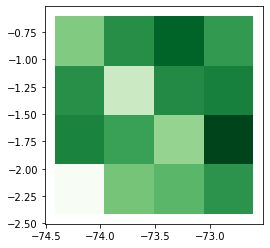

In [ ]:
drought = ee.ImageCollection('IDAHO_EPSCOR/TERRACLIMATE')

dS = '2014-01-01'
dE = '2019-01-01'
dSUTC = ee.Date(dS, 'GMT')
dEUTC = ee.Date(dE, 'GMT')

filtered = drought.filterDate(dSUTC, dEUTC.advance(1, 'day'))

image = filtered.mean()
series = image.reduceRegions(collection = polygons[polygon],
                                reducer = ee.Reducer.mean(),
                                scale = 500)

palmer = series.getInfo()['features'][0]['properties']['mean']


In [38]:
climate_grid = raster_climate(geo_grid,'IDAHO_EPSCOR/TERRACLIMATE','pdsi','2014-01-01','2019-01-01')

,geometry,pai,ee_geometry,pdsi
0,"POLYGON ((-74.41644 -0.60594, -73.96303 -0.605...",3.577388,"ee.Geometry({\n ""functionInvocationValue"": {\...",112.148585
1,"POLYGON ((-74.41644 -1.05760, -73.96303 -1.057...",3.749745,"ee.Geometry({\n ""functionInvocationValue"": {\...",230.380634
2,"POLYGON ((-74.41644 -1.50926, -73.96303 -1.509...",3.780574,"ee.Geometry({\n ""functionInvocationValue"": {\...",320.090006
3,"POLYGON ((-74.41644 -1.96092, -73.96303 -1.960...",3.281721,"ee.Geometry({\n ""functionInvocationValue"": {\...",317.415044
4,"POLYGON ((-73.96303 -0.60594, -73.50962 -0.605...",3.753355,"ee.Geometry({\n ""functionInvocationValue"": {\...",138.165933
5,"POLYGON ((-73.96303 -1.05760, -73.50962 -1.057...",3.432283,"ee.Geometry({\n ""functionInvocationValue"": {\...",199.576904
6,"POLYGON ((-73.96303 -1.50926, -73.50962 -1.509...",3.703637,"ee.Geometry({\n ""functionInvocationValue"": {\...",209.236104
7,"POLYGON ((-73.96303 -1.96092, -73.50962 -1.960...",3.599982,"ee.Geometry({\n ""functionInvocationValue"": {\...",208.558102
8,"POLYGON ((-73.50962 -0.60594, -73.05621 -0.605...",3.859720,"ee.Geometry({\n ""functionInvocationValue"": {\...",188.279302
9,"POLYGON ((-73.50962 -1.05760, -73.05621 -1.057...",3.762828,"ee.Geometry({\n ""functionInvocationValue"": {\...",196.365192


<AxesSubplot: >

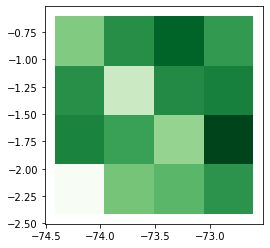

In [42]:
climate_grid.plot(column='pai', cmap='Greens')

In [49]:
def raster_climate_all_polygons(r: int, df: pd.DataFrame,
                                shape: gpd.GeoDataFrame, gedi_var: str, 
                                climate_dataset: str, climate_var: str,
                                climate_start: str, climate_end: str):

    master_climate = pd.DataFrame()

    for pol in range(1,9):
        grid = rasterise_polygon(r, df, shape, pol) \
                            .groupby(['x', 'y']).mean()[gedi_var].reset_index()
        geo_grid = calculate_grid_geometry(grid, r, shape, pol, [gedi_var])

        climate_grid = raster_climate(geo_grid, climate_dataset, climate_var,
                                      climate_start, climate_end)
        climate_grid['polygon_id'] = pol

        master_climate = pd.concat([master_climate, climate_grid])

    return master_climate

/home/og309/drought-with-gedi/drought/data/rasterisation.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = ((df['lon_lowestmode'] - minx) / stepx).apply(np.floor)
/home/og309/drought-with-gedi/drought/data/rasterisation.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = ((maxy - df['lat_lowestmode']) / stepy).apply(np.floor)
/tmp/ipykernel_48354/2383246433.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

In [50]:
master_climate

,geometry,pai,pdsi,polygon_id
0,"POLYGON ((-74.41644 -0.60594, -73.96303 -0.605...",3.577388,112.148585,1
1,"POLYGON ((-74.41644 -1.05760, -73.96303 -1.057...",3.749745,230.380634,1
2,"POLYGON ((-74.41644 -1.50926, -73.96303 -1.509...",3.780574,320.090006,1
3,"POLYGON ((-74.41644 -1.96092, -73.96303 -1.960...",3.281721,317.415044,1
4,"POLYGON ((-73.96303 -0.60594, -73.50962 -0.605...",3.753355,138.165933,1
...,...,...,...,...
11,"POLYGON ((-41.27181 -16.91276, -40.82265 -16.9...",1.306232,-374.975763,8
12,"POLYGON ((-40.82265 -15.62071, -40.37349 -15.6...",1.534210,-380.352140,8
13,"POLYGON ((-40.82265 -16.05140, -40.37349 -16.0...",1.118336,-362.724497,8
14,"POLYGON ((-40.82265 -16.48208, -40.37349 -16.4...",1.056982,-352.047487,8


In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
model = sm.OLS(master_climate['pai'], sm.add_constant(master_climate['pdsi'])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    pai   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     293.3
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.07e-34
Time:                        22:43:03   Log-Likelihood:                -146.09
No. Observations:                 128   AIC:                             296.2
Df Residuals:                     126   BIC:                             301.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9355      0.073     40.194      0.0

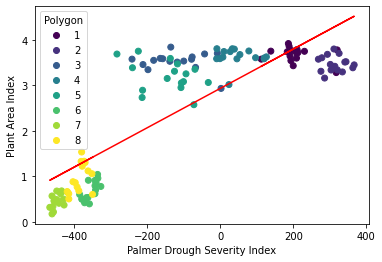

In [68]:
sc = plt.scatter(master_climate['pdsi'], master_climate['pai'], c = pd.Categorical(master_climate['polygon_id']).codes)
plt.plot(master_climate['pdsi'], model.predict(), color='red')
plt.xlabel('Palmer Drough Severity Index')
plt.ylabel('Plant Area Index')
categories = [i for i in range(1,9)]
handles, labels = sc.legend_elements()
plt.legend(handles, categories, title='Polygon')
plt.show()

In [78]:
df = master_climate[master_climate['polygon_id'] < 5]

model = sm.OLS(df['pai'], sm.add_constant(df['pdsi'])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    pai   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.2701
Date:                Thu, 02 Mar 2023   Prob (F-statistic):              0.605
Time:                        23:19:02   Log-Likelihood:                 14.854
No. Observations:                  64   AIC:                            -25.71
Df Residuals:                      62   BIC:                            -21.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5871      0.029    123.452      0.0

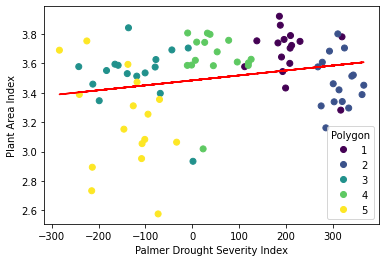

In [74]:
sc = plt.scatter(df['pdsi'], df['pai'], c = pd.Categorical(df['polygon_id']).codes)
plt.plot(df['pdsi'], model.predict(), color='red')
plt.xlabel('Palmer Drought Severity Index')
plt.ylabel('Plant Area Index')
categories = [i for i in range(df['polygon_id'].min(),df['polygon_id'].max() + 1)]
handles, labels = sc.legend_elements()
plt.legend(handles, categories, title='Polygon')
plt.show()

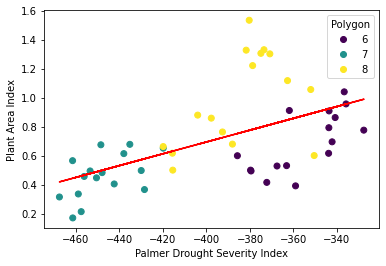

In [76]:
sc = plt.scatter(df['pdsi'], df['pai'], c = pd.Categorical(df['polygon_id']).codes)
plt.plot(df['pdsi'], model.predict(), color='red')
plt.xlabel('Palmer Drought Severity Index')
plt.ylabel('Plant Area Index')
categories = [i for i in range(df['polygon_id'].min(),df['polygon_id'].max() + 1)]
handles, labels = sc.legend_elements()
plt.legend(handles, categories, title='Polygon')
plt.show()

In [93]:
means = master_climate.groupby(['polygon_id']).mean().reset_index()

/tmp/ipykernel_48354/3819896070.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = master_climate.groupby(['polygon_id']).mean().reset_index()


In [97]:
mean

,polygon_id,pai,pdsi
0,1,3.678746,206.026958
1,2,3.473266,314.095396
2,3,3.528844,-120.427441
3,4,3.634782,47.215291
4,5,4.008000,-143.144046
5,6,0.690023,-355.203742
6,7,0.462044,-447.383587
7,8,0.985699,-384.942017


In [98]:
df = means[means['polygon_id'] < 6]

model = sm.OLS(df['pai'], sm.add_constant(df['pdsi'])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    pai   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1.289
Date:                Thu, 02 Mar 2023   Prob (F-statistic):              0.339
Time:                        23:30:49   Log-Likelihood:                 2.1933
No. Observations:                   5   AIC:                           -0.3865
Df Residuals:                       3   BIC:                            -1.168
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6995      0.095     38.879      0.0

/home/og309/.local/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
'IDAHO_EPSCOR/TERRACLIMATE','pdsi','2014-01-01','2019-01-01'